# Data Visualization Ethics Challenge

In this activity, you’ll work with a simple dataset and examine two deliberately bad charts.  
Each one ignores multiple best practices for ethical and effective visualization.

Your job is to:

1. Review each chart and note at least three issues you see.  
2. Create a new chart (or charts) that present the data clearly, accurately, and honestly.  
3. Include clear labels, a cited data source, and a descriptive but neutral title.

**Remember:** Strong visualizations tell the truth, provide context, and avoid design choices that distort or mislead.


## Step 1: Load the dataset

We’re using a provided CSV file with fictional sales data for a coffee chain.  
No need to modify anything in this cell — just run it so the dataset loads into your notebook.  
Once loaded, take a quick look at the first few rows to get familiar with the columns and values.


In [65]:
import pandas as pd
import matplotlib.pyplot as plt

coffee_df = pd.read_csv("fake_coffee_chain_sales.csv")
coffee_df.head()

,Year,Month,Region,Category,Sales,Profit
0,2020,January,East,Espresso,14724,5290.46
1,2020,January,East,Lattes,11948,4138.77
2,2020,January,East,Tea,18660,5959.44
3,2020,January,East,Pastries,11265,2604.46
4,2020,January,East,Beans,8954,2613.22


## Step 2: Review the BAD Charts

Below are two deliberately poor visualizations.  
Your task: Carefully review each and take notes on what you think is wrong, misleading, or just poorly designed.  
Think about chart type, colors, scales, labeling, and whether the chart tells the truth.  


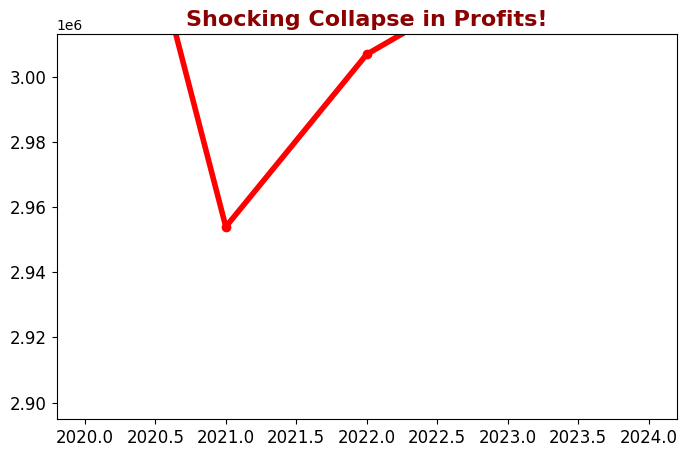

In [66]:
plt.figure(figsize=(8,5))
subset = coffee_df.groupby("Year")["Sales"].sum().reset_index()

# Wrong variable for title, truncated y-axis, misleading color & framing
plt.plot(subset["Year"], subset["Sales"], color="red", linewidth=4, marker="o")
plt.ylim(subset["Sales"].min() * 0.98, subset["Sales"].min() * 1.02)  # extreme truncation
plt.title("Shocking Collapse in Profits!", fontsize=16, fontweight="bold", color="darkred")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


### Write your notes about bad chart #1 here:
-figsize can be adjusted so to make the graph look better
-the ylim truncates the graph to exagerate a drop by make the small drop look big
-graph shows sales data, not profit data
-color is missleading , red seems negative, framing needs styling
-missing labels
-unecneed to style spines
-need to fix values

(double click to open this markdown cell and type into it)

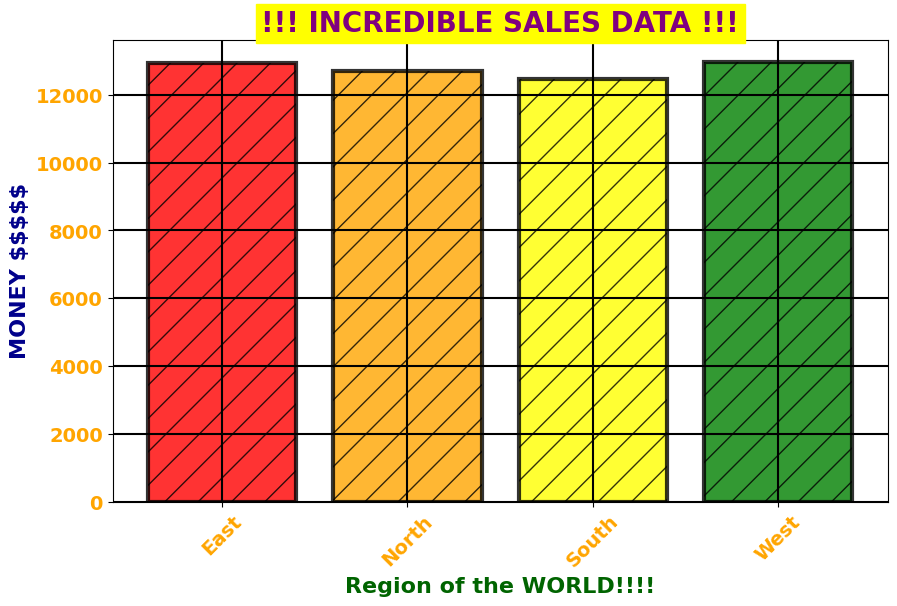

In [67]:
plt.figure(figsize=(10,6))
avg_sales = coffee_df.groupby("Region")["Sales"].mean().reset_index()

colors = ["red","orange","yellow","green","blue","purple"]

plt.bar(avg_sales["Region"], avg_sales["Sales"], 
        color=colors, edgecolor="black", linewidth=3, hatch="/", alpha=0.8)
plt.title("!!! INCREDIBLE SALES DATA !!!", fontsize=20, fontweight="bold", color="purple", backgroundcolor="yellow")
plt.grid(True, which='both', color='black', linestyle='-', linewidth=1.5)
plt.xlabel("Region of the WORLD!!!!", fontsize=16, fontweight="bold", color="darkgreen")
plt.ylabel("MONEY $$$$$", fontsize=16, fontweight="bold", color="darkblue")
plt.xticks(rotation=45, fontsize=14, fontweight="bold", color="orange")
plt.yticks(fontsize=14, fontweight="bold", color="orange")
plt.show()


### Write your notes about bad chart #2 here:
-obnoxious title, too big, bad colors, has a background
-bad labeling
-ugly styling

(double click to open this markdown cell and type into it)

## Step 3: Your Turn – Make It Right

Now it’s your turn to fix things.  

- Start by thinking about a question you want to answer with this dataset.  
- Choose a visualization type that matches your question and the data structure.  
- Apply the best practices from our lessons: clear labeling, appropriate scale, purposeful color, simplicity, and accessibility.  
- Be honest - don’t manipulate the chart to make a point that the data doesn’t support.  

When you’re done, add your chart(s) below. You may create more than one if it helps tell the story better.  


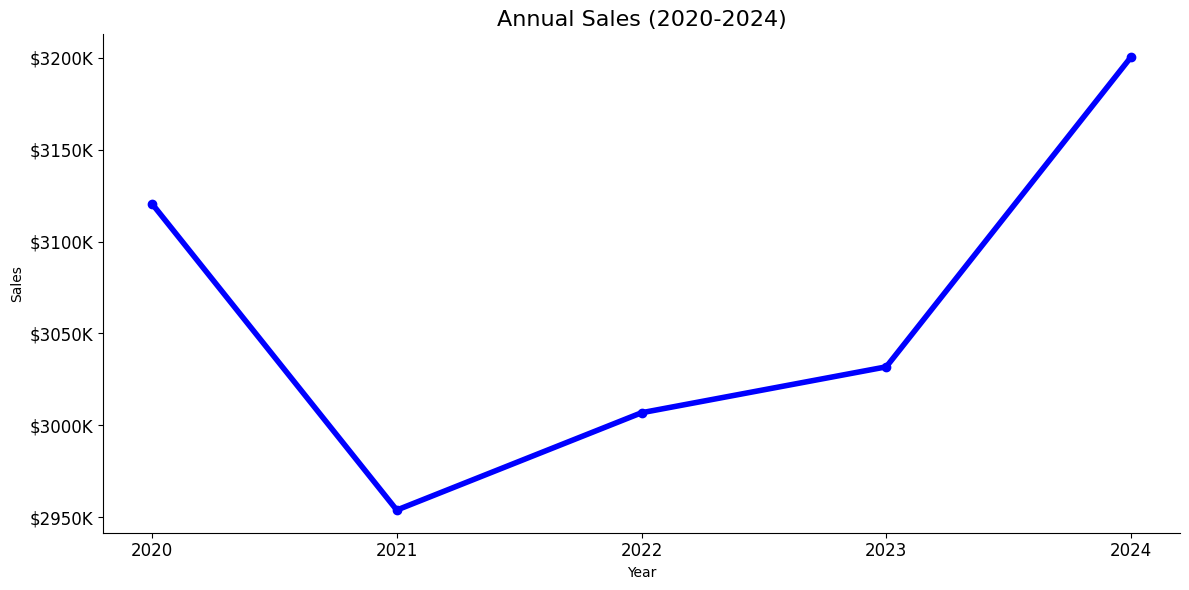

In [68]:
# Your GOOD visualization(s) here
#adjusted figsize to make it look better
plt.figure(figsize=(12,6))
subset = coffee_df.groupby("Year")["Sales"].sum().reset_index()

# Wrong variable for title, truncated y-axis, misleading color & framing
#changed color to a more neutral color
plt.plot(subset["Year"], subset["Sales"], color="blue", linewidth=4, marker="o")

plt.xlabel("Year")
plt.ylabel("Sales")
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

#commented this out and let matplot scale the graph
#plt.ylim(subset["Sales"].min() * 0.98, subset["Sales"].min() * 1.02)  # extreme truncation

#updated wrong title, and tweaked styling
plt.title("Annual Sales (2020-2024)", fontsize=16, fontweight="normal", color="black")

plt.xticks(subset["Year"], fontsize=12)

plt.yticks(fontsize=12)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
#formatted values to make them easier to read
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.tight_layout()
plt.show()

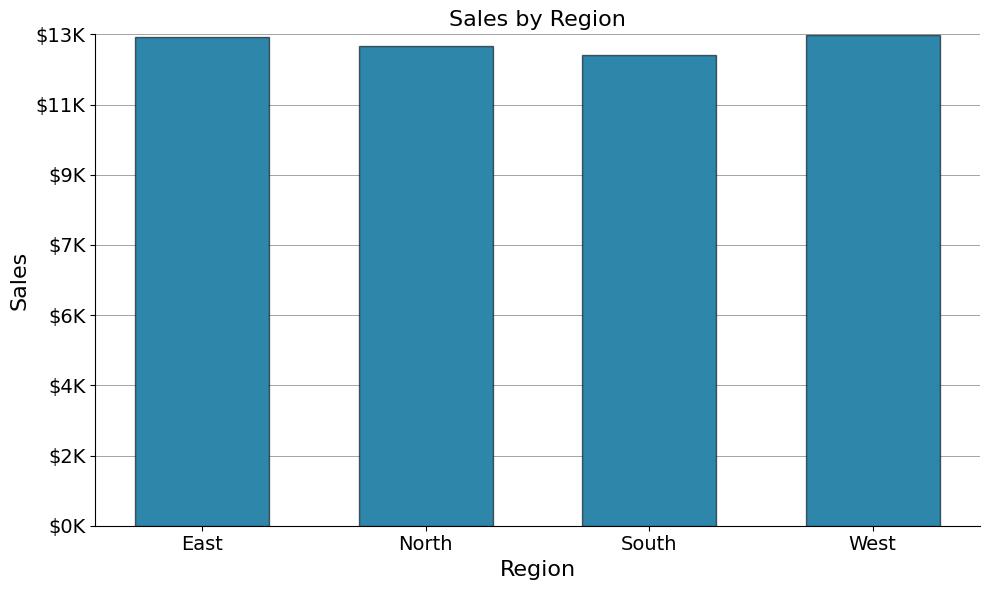

In [73]:
import numpy as np
#to set max tick close to the highest bar
plt.figure(figsize=(10,6))
#removed reset index so I can use the regions as the index
avg_sales = coffee_df.groupby("Region")["Sales"].mean()

#colors = ["red","orange","yellow","green","blue","purple"]
#too many colors makes it obnoxious and hard to read
colors = "#2E86AB" 
plt.bar(avg_sales.index, avg_sales.values, 
        color=colors, edgecolor= "#00000096", linewidth=1,width = 0.6, zorder = 3)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


#fixed title to look more professional , removed unnecessary background
plt.title("Sales by Region", fontsize=16, fontweight="normal", color="black")

plt.grid(True,axis ='y', color='gray', linestyle='-', linewidth=0.5)
#obnoxious labels
plt.xlabel("Region", fontsize=16, fontweight="normal", color="black")
plt.ylabel("Sales", fontsize=16, fontweight="normal", color="black")
#unnecessary rotation
plt.xticks(fontsize=14, fontweight="normal", color="black")
plt.yticks(fontsize=14, fontweight="normal", color="black")
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

max_val = avg_sales.values.max()
nice_max = math.ceil(max_val/1000) * 1000
plt.ylim(0, nice_max) 
#forcing matplotlib to include the another tick so make it visually pleasing
num_ticks = 8
plt.yticks(np.linspace(0, nice_max, num_ticks))

plt.tight_layout()
plt.show()